In [86]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.datasets import make_regression
from sklearn.linear_model import Ridge,RidgeCV,Lasso,lasso_path,enet_path
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1 Effet de la régularisation ridge

### 1. Générez un jeu de données synthétique avec la fonction make_regression de Scikit-learn :

In [87]:
X, y, w = make_regression(n_samples =100, n_features =10, n_informative =8,
coef=True , random_state =42)
w

array([93.62122462,  0.        ,  3.15861448, 63.64302495,  0.        ,
       10.45678403, 70.64757265, 16.74825823,  5.19712837, 54.12963353])

### w represente les coefficient de la relation entre X et y . Le premier element et le deuxieme element du vecteur w sont nuls ce qui veut dire que la premiere et la 2eme caracteristique de X multiplié à 0 pour trouver y 

In [88]:
lambdas = np.logspace(-3,4,100)

In [89]:
coefs = []
errors_coefs = []
for a in lambdas:
    clf = Ridge(alpha=a)
    clf.fit(X, y)
    coefs.append(clf.coef_)
    errors_coefs.append(mean_absolute_error(clf.coef_ , w))

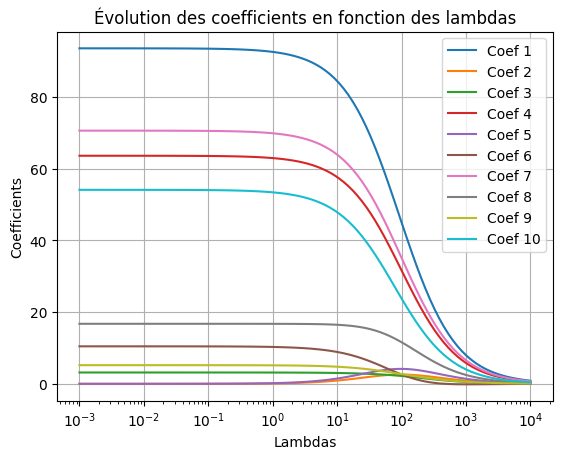

In [90]:
for i in range(len(coefs[0])): 
    plt.plot(lambdas, np.array(coefs)[:,i], label=f"Coef {i+1}")
plt.xscale("log")
plt.xlabel("Lambdas")
plt.ylabel("Coefficients")
plt.title("Évolution des coefficients en fonction des lambdas")
plt.legend() 
plt.grid(True)
plt.show()


#### On que voit plus lambdas augmente plus les coefficients tendent tous vers 0. Y'a aussi des coefficient qui sont toujours nuls ou proches de 0 cela s'ignifie que ces coefficient sont negligeable pour le calculs des parametre du model

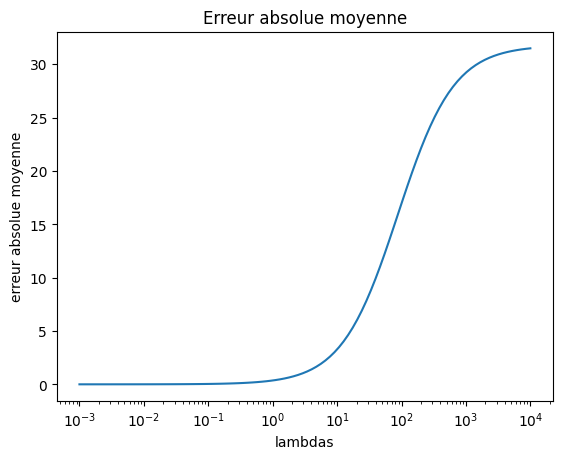

In [91]:
plt.plot(lambdas,errors_coefs)
plt.xlabel("lambdas")
plt.title('Erreur absolue moyenne')
plt.ylabel("erreur absolue moyenne")
plt.xscale('log')

#### Plus lambdas augmente plus l'erreur quadratique moyenne devient importante. Ceci s'explique par le fait que plus la valeur de lambda est grande plus la penalisation devient importante et on tend à un sous-apprentissage parce que lambda penalise les modeles complexes

# 2 Impact de la normalisation des données

In [92]:
df = pd.read_csv("./real_estate.csv", delimiter=",")
df.drop(columns =["No"], inplace=True)
y = df["Y house price of unit area"]
X = df.drop(columns =["Y house price of unit area"])
df.head(10)

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
5,2012.667,7.1,2175.03000,3,24.96305,121.51254,32.1
6,2012.667,34.5,623.47310,7,24.97933,121.53642,40.3
7,2013.417,20.3,287.60250,6,24.98042,121.54228,46.7
8,2013.500,31.7,5512.03800,1,24.95095,121.48458,18.8
9,2013.417,17.9,1783.18000,3,24.96731,121.51486,22.1


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    float64
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   X5 latitude                             414 non-null    float64
 5   X6 longitude                            414 non-null    float64
 6   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


### 2. Séparez les données pour former un jeu d’entraînement avec une moitié des données et un jeu de test avec l’autre moitié

In [94]:
X_train,X_Test,y_train,y_Test=train_test_split(X,y,test_size=0.5,random_state=42)

### 3. Entraînez un modèle de régression ridge sur les données d’entraînement, en sélectionnant la valeur de λ par validation croisée à l’aide de la classe RidgeCV de Scikit-learn

In [95]:
ridge = RidgeCV(alphas=lambdas).fit(X_train, y_train)
pred = ridge.preridge = RidgeCV(alphas=lambdas).fit(X_train, y_train)
pred = ridge.predict (X_Test)
print(f"Best lambda is {ridge.alpha_}")

Best lambda is 0.0036783797718286343


### 4. Calculez l’erreur quadratique moyenne (MSE) et le coefficient de détermination R2 du modèle obtenu, sur les données de test

In [96]:
MSE=mean_squared_error(y_Test,pred)
r2=r2_score(y_Test,pred)
print(f'MSE = {MSE} et R2 = {r2}')

MSE = 64.83186483867972 et R2 = 0.5915368945743638


### 5. Normalisez les données avec la classe StandardScaler

In [97]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_Test)

### 6. Entraînez un modèle de régression ridge sur les données normalisées, avec la même procédure de validation croisée

In [98]:
ridge = RidgeCV(alphas=lambdas).fit(X_train_std, y_train)
pred = ridge.predict (X_test_std)
print(f"Best lambda is {ridge.alpha_}")

Best lambda is 12.61856883066021


### 7. Calculez l’erreur quadratique moyenne et le coefficient de détermination R2 et comparez les résultats obtenus avec ceux obtenus sans normalisation

In [99]:
MSE=mean_squared_error(y_Test,pred)
r2=r2_score(y_Test,pred)
print(f'MSE = {MSE} et R2 = {r2}')

MSE = 63.893167808003625 et R2 = 0.5974510095725649


### 8. Commentez les résultats obtenus

#### Y'a pas une tres grande difference entre la MSE et R2 non normalisé et la MSE et R2 normalisé. La normalisation n'a pas une grande effet sur ces calculs

# 3 Régression LASSO

### 1. Chargez la base de données

In [100]:
df = pd.read_csv("./baseball_processed.csv", delimiter=",")
print(df.describe())

         lnSalary      BatAVG      OnBase        Runs        Hits     Doubles  \
count  337.000000  337.000000  337.000000  337.000000  337.000000  337.000000   
mean     6.535420    0.257825    0.323973   46.697329   92.833828   16.673591   
std      1.176543    0.039546    0.047132   29.020166   51.896322   10.452001   
min      4.691348    0.063000    0.063000    0.000000    1.000000    0.000000   
25%      5.438079    0.238000    0.297000   22.000000   51.000000    9.000000   
50%      6.606650    0.260000    0.323000   41.000000   91.000000   15.000000   
75%      7.673223    0.281000    0.354000   69.000000  136.000000   23.000000   
max      8.716044    0.457000    0.486000  133.000000  216.000000   49.000000   

          Triples    HomeRuns         RBI       Walks  StrikeOuts  \
count  337.000000  337.000000  337.000000  337.000000  337.000000   
mean     2.338279    9.097923   44.020772   35.017804   56.706231   
std      2.543336    9.289934   29.559406   24.842474   33.8287

In [101]:
df.head(5)

,lnSalary,BatAVG,OnBase,Runs,Hits,Doubles,Triples,HomeRuns,RBI,Walks,StrikeOuts,StolenBases,Errors,FreeAgElig,FreeAge91,ArbElig,Arb91
0,8.101678,0.272,0.302,69,153,21,4,31,104,22,80,4,3,1,0,0,0
1,7.863267,0.269,0.335,58,111,17,2,18,66,39,69,0,3,1,1,0,0
2,7.824046,0.249,0.337,54,115,15,1,17,73,63,116,6,5,1,0,0,0
3,7.813996,0.260,0.292,59,128,22,7,12,50,23,64,21,21,0,0,1,0
4,7.746301,0.273,0.346,87,169,28,5,8,58,70,53,3,8,0,0,1,0


### 2. Séparez les données pour former un jeu d’entraînement avec une moitié des données et un jeu de test avec l’autre moitié

In [102]:
target=df['lnSalary']
data=df.drop(columns='lnSalary')
X_train,X_Test,Y_Train,Y_Test=train_test_split(data,target,test_size=0.5,random_state=42)

### 3. Normalisez les données d’entraînement et de test avec la classe StandardScaler

In [103]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_Test)

### 4. Entraînez un modèle de régression LASSO sur les données d’entraînement normalisées, avec la classe Lasso de Scikit-learn, en utilisant la paramétrisation par défaut

In [104]:
lasso=Lasso()
lasso.fit(X_train,Y_Train)
print(lasso.coef_)

[-0.         -0.          0.          0.00856664  0.          0.
  0.          0.01312533  0.0029108  -0.00386151 -0.         -0.
  0.          0.          0.          0.        ]


#### Observation ...

In [105]:
pass

### 7. Créez un vecteur lambdas qui contient 100 valeurs, distribuées uniformément sur une échelle logarithmique entre 10−4 et 10

In [106]:
lambdas = np.logspace(-4,1,100)

### 8. En utilisant la fonction lasso_path de Scikit-learn, entraînez un modèle de régression LASSO pour chaque valeur de λ de lambdas :

In [107]:
alphas_lasso , coefs_lasso , _ = lasso_path(X_train_std , Y_Train ,alphas=lambdas)

### 9. Que contiennent les variables alphas_lasso et coefs_lasso ?

#### coefs_lasso represente l'evolution de chaque coefficient jusqu'a ce qu'il soit nul en fonction des valeurs de lambdas. alphas_lasso represente les lambdas qu'on a passé en parametre et qui ont servi à calculer les coefficients mais en le triant par ordre decroissante.

### 10. Affichez l’évolution des valeurs des paramètres en fonction de λ :

/tmp/ipykernel_35529/1383543149.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[1].legend()


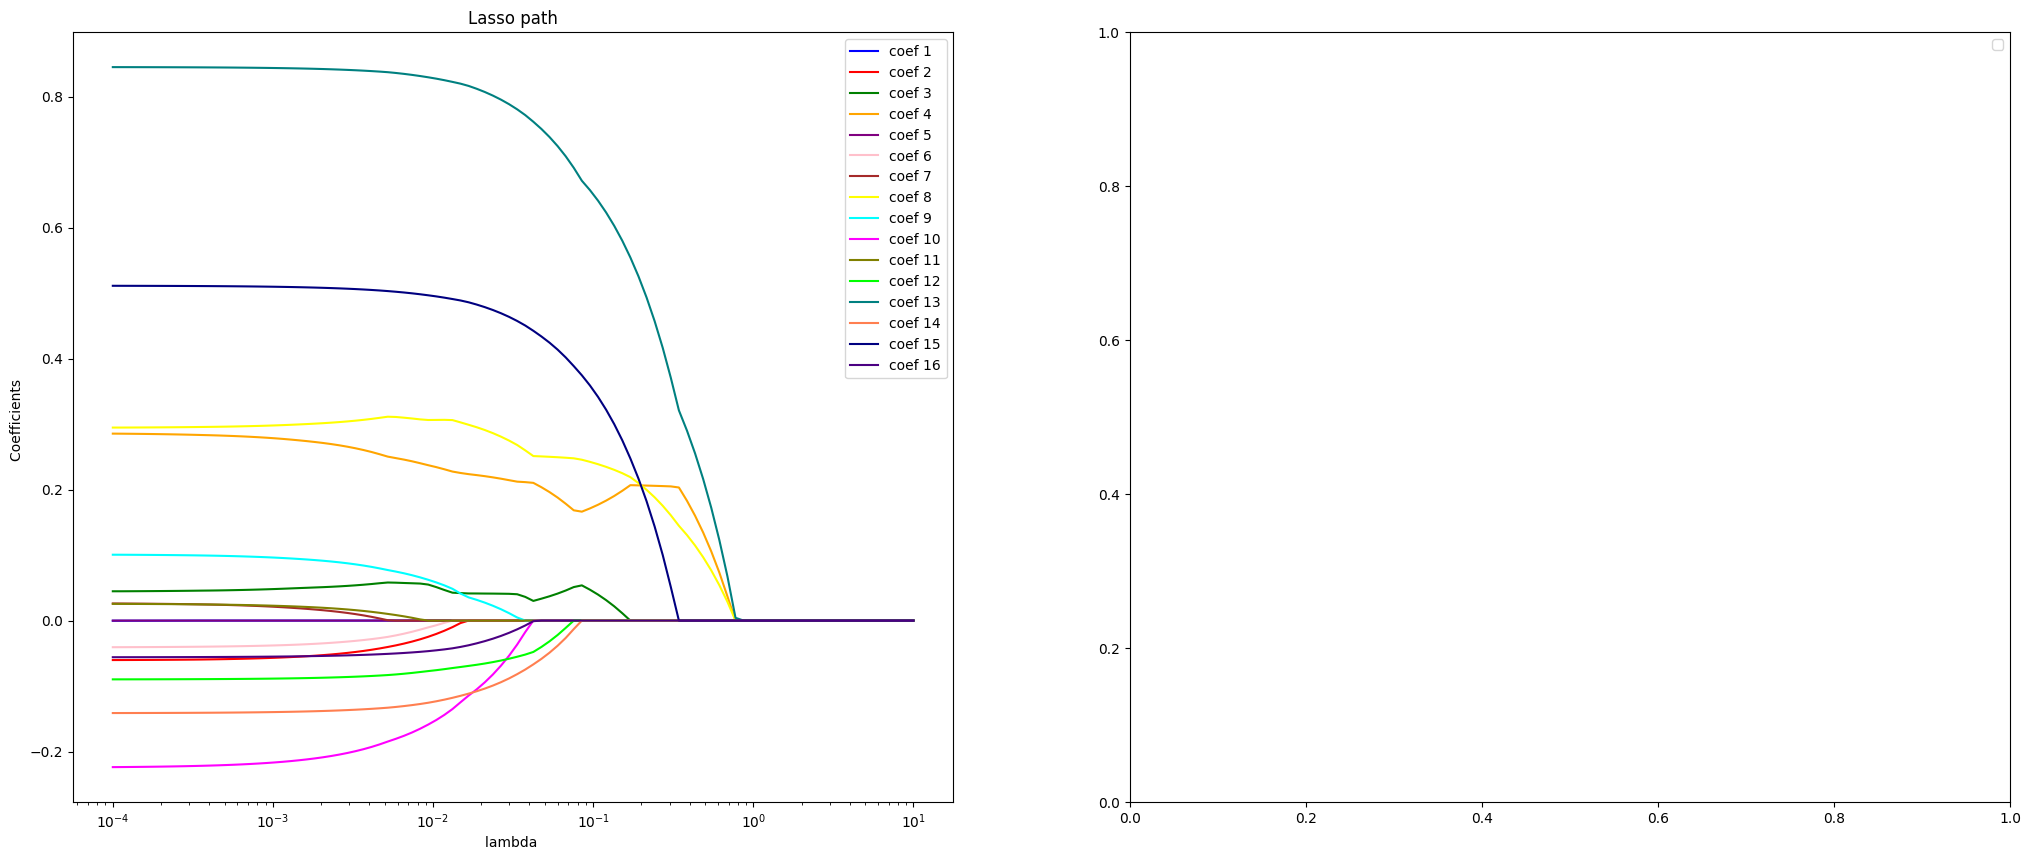

In [108]:
fig , axs = plt.subplots (1,2, figsize =(25, 10)) # change the size if needed
# 16 different colors , one per coefficient:
colors = ["blue", "red", "green", "orange", "purple", "pink", "brown", "yellow",
"cyan", "magenta", "olive", "lime", "teal", "coral", "navy", "indigo", "gold"]
i=0
for coef_l , c in zip(coefs_lasso , colors):
    axs[0]. plot(alphas_lasso , coef_l , color=c,label=f'coef {i+1}')
    axs[0]. set_xscale('log')
    i+=1
axs[0]. set_xscale('log')
axs[0].set_xlabel('lambda ')
axs[0].set_ylabel('Coefficients ')
axs[0].set_title('Lasso path')
axs[0].legend()
axs[1].legend()

### 11. Commentez les résultats obtenus

#### On voit que quand lambda est superieur ou égale à 1 les valeurs des coefficients s'annulent.Y'a certain valeurs de lambdas où seulement certains coefficient s'annulent donc ces coefficients n'agissent pas sur le calcule avec cet lambda

### 12. En suivant la même procédure, entraînez un modèle de régression Elastic-Net sur les données d’entraînement normalisées, avec la fonction enet_path de Scikit-learn

In [109]:
alphas_enet , coefs_enet , _ = enet_path(X_train_std , Y_Train ,alphas=lambdas)

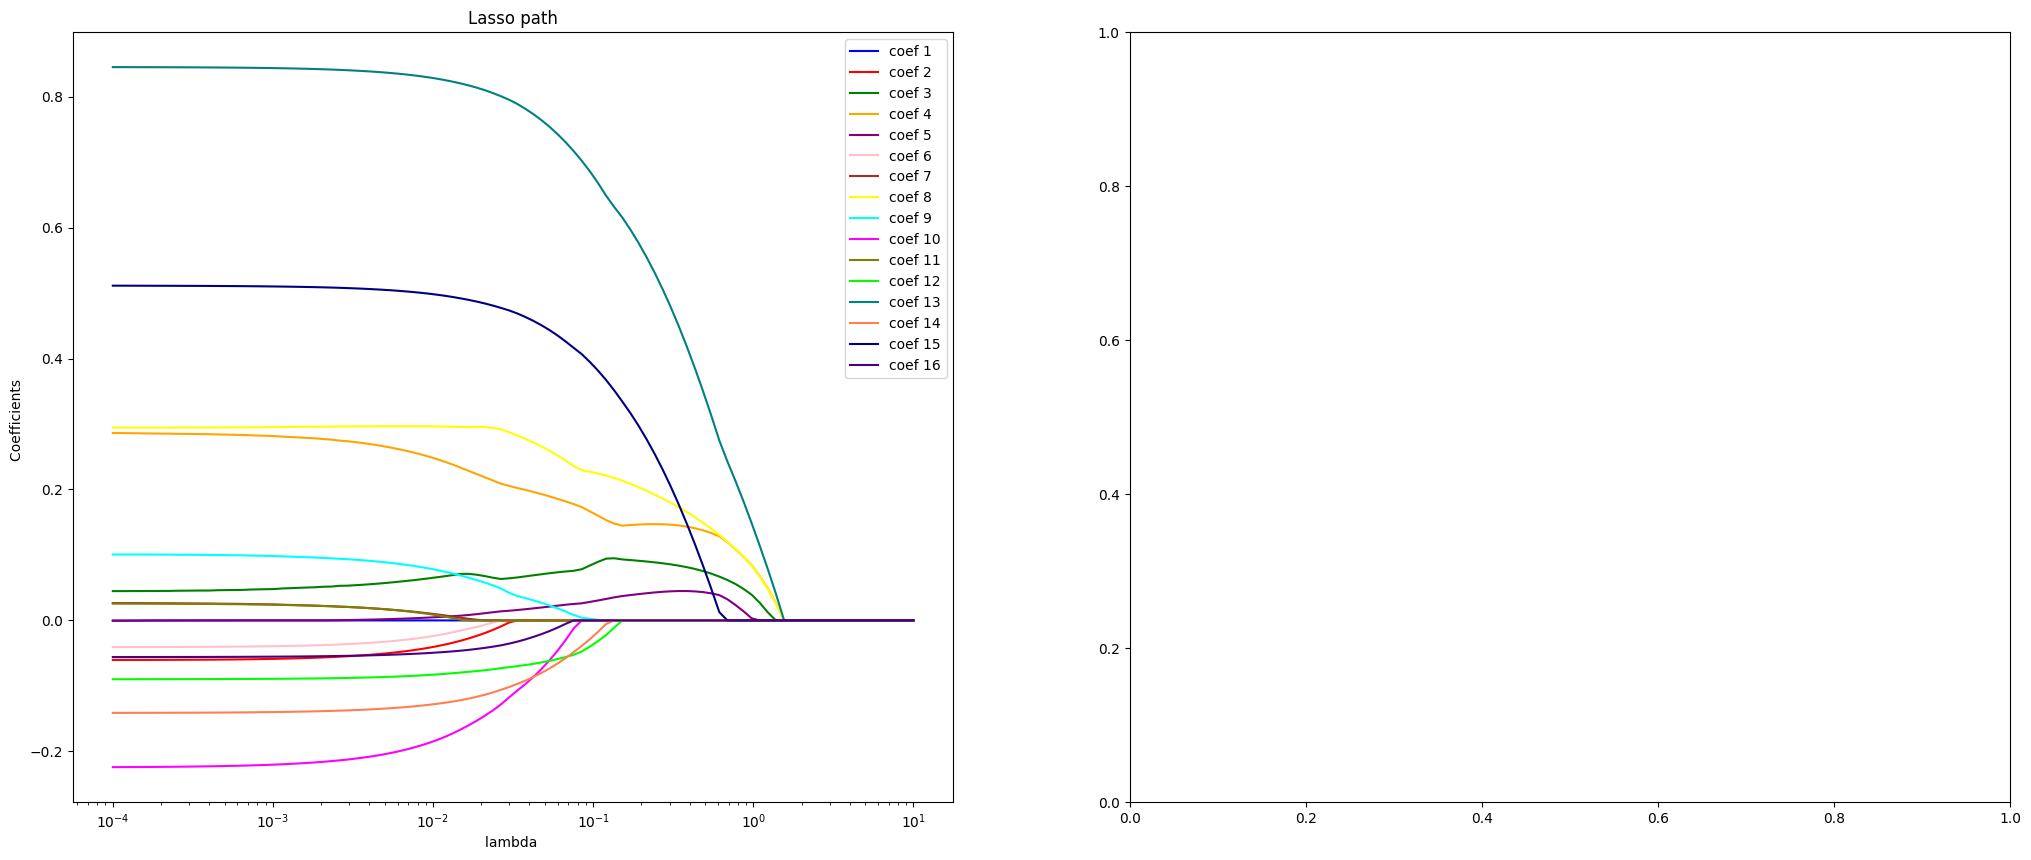

In [110]:
fig , axs = plt.subplots (1,2, figsize =(25, 10)) # change the size if needed
# 16 different colors , one per coefficient:
colors = ["blue", "red", "green", "orange", "purple", "pink", "brown", "yellow",
"cyan", "magenta", "olive", "lime", "teal", "coral", "navy", "indigo", "gold"]
i=0
for coef_l , c in zip(coefs_enet , colors):
    axs[0]. plot(alphas_enet , coef_l , color=c,label=f'coef {i+1}')
    axs[0]. set_xscale('log')
    i+=1
axs[0].set_xlabel('lambda ')
axs[0].set_ylabel('Coefficients ')
axs[0].set_title('Lasso path')
axs[0].legend()

### 13. Affichez sur le graphique axs[1] l’évolution des paramètres des modèles LASSO et Elastic-Net en fonction de λ. Commentez les résultats obtenus

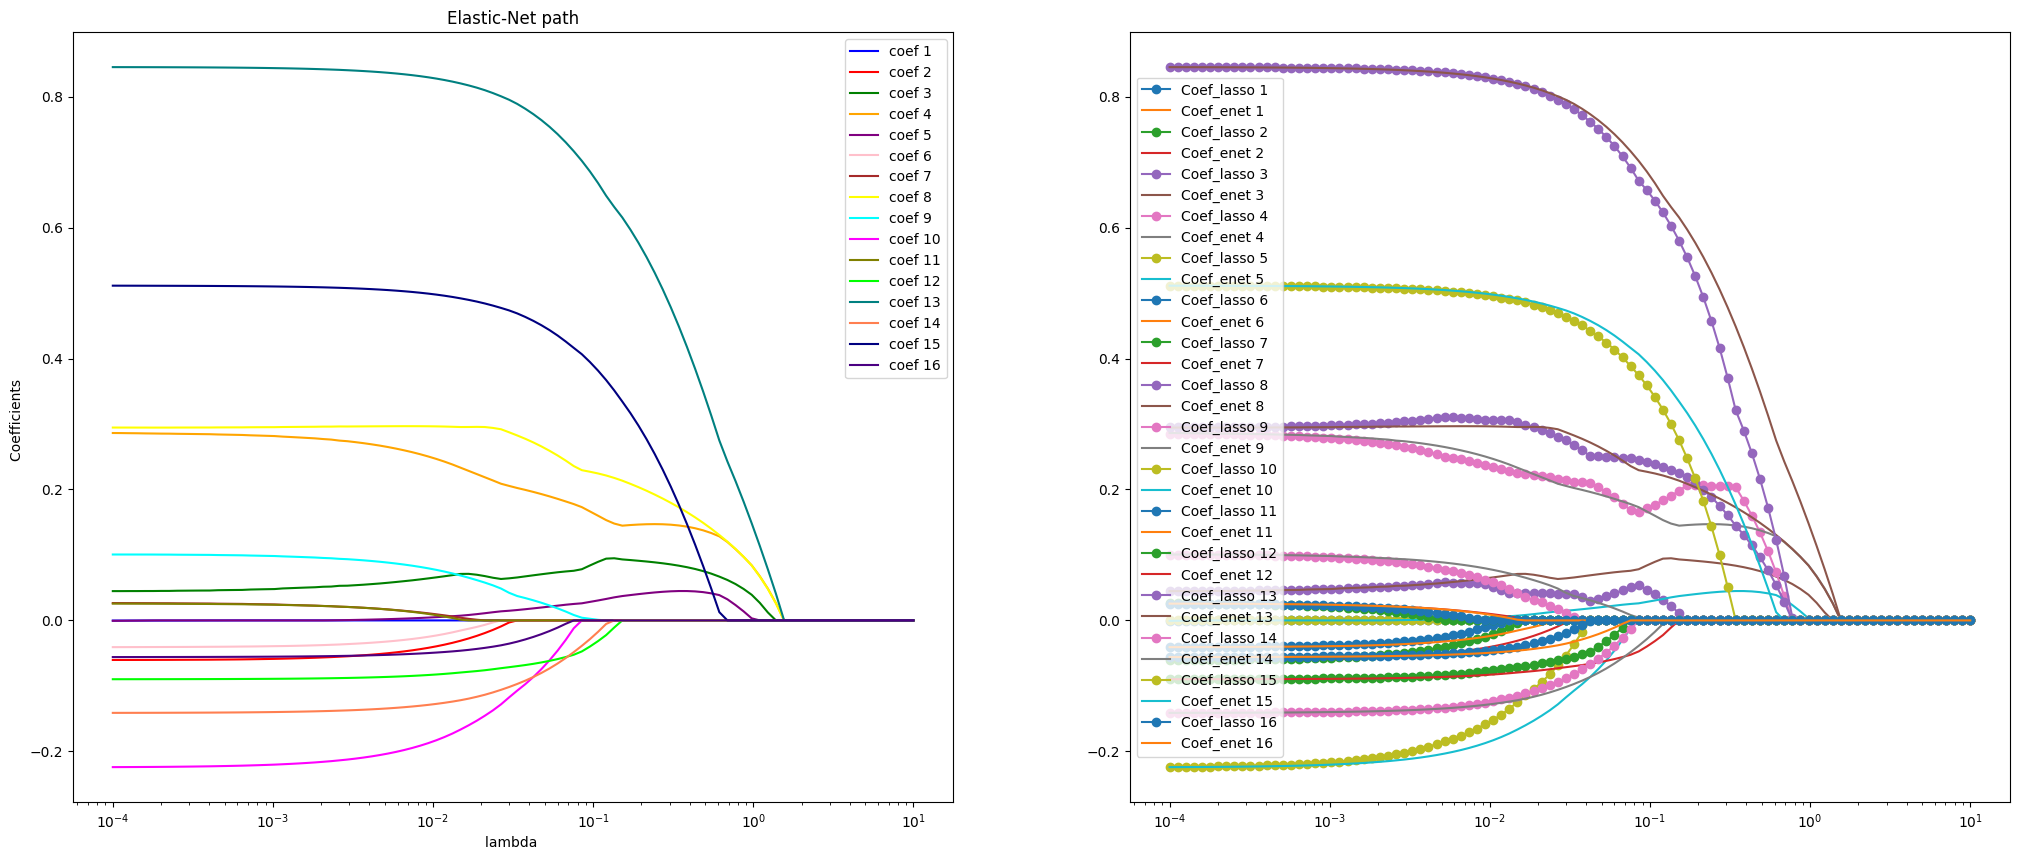

In [111]:
fig , axs = plt.subplots (1,2, figsize =(25, 10)) # change the size if needed
# 16 different colors , one per coefficient:
colors = ["blue", "red", "green", "orange", "purple", "pink", "brown", "yellow",
"cyan", "magenta", "olive", "lime", "teal", "coral", "navy", "indigo", "gold"]
i=0
for coef_l , c in zip(coefs_enet , colors):
    axs[0]. plot(alphas_enet , coef_l , color=c,label=f'coef {i+1}')
    axs[0]. set_xscale('log')
    i+=1
for i in range(len(coefs_lasso)): 
    axs[1].plot(alphas_enet, coefs_lasso[i],'o-',label=f"Coef_lasso {i+1}")
    axs[1].plot(alphas_enet, coefs_enet[i], label=f"Coef_enet {i+1}")
axs[0].set_xlabel('lambda ')
axs[1].set_xscale('log')
axs[0].set_ylabel('Coefficients ')
axs[0].set_title('Elastic-Net path')

axs[0].legend()
axs[1].legend()

#### On voit que les valeurs des coefficient pour Lasso s'annulent plus rapidement (quand lambda>=1) car Lasso peut donner des nuls pour les coefficients alors que les coefficients avec Elastic-Net s'annulent lentement. Ces normal parce que elastic net n'a pas tendance à donner des coefficients de valeurs nuls mais il donne de trés faibles valeurs que la precision de la machine considere commme 0 

### 14. Recommencez cette expérience avec des valeurs différentes du paramètres l1_ratio d’Elastic-Net. Commentez les résultats obten

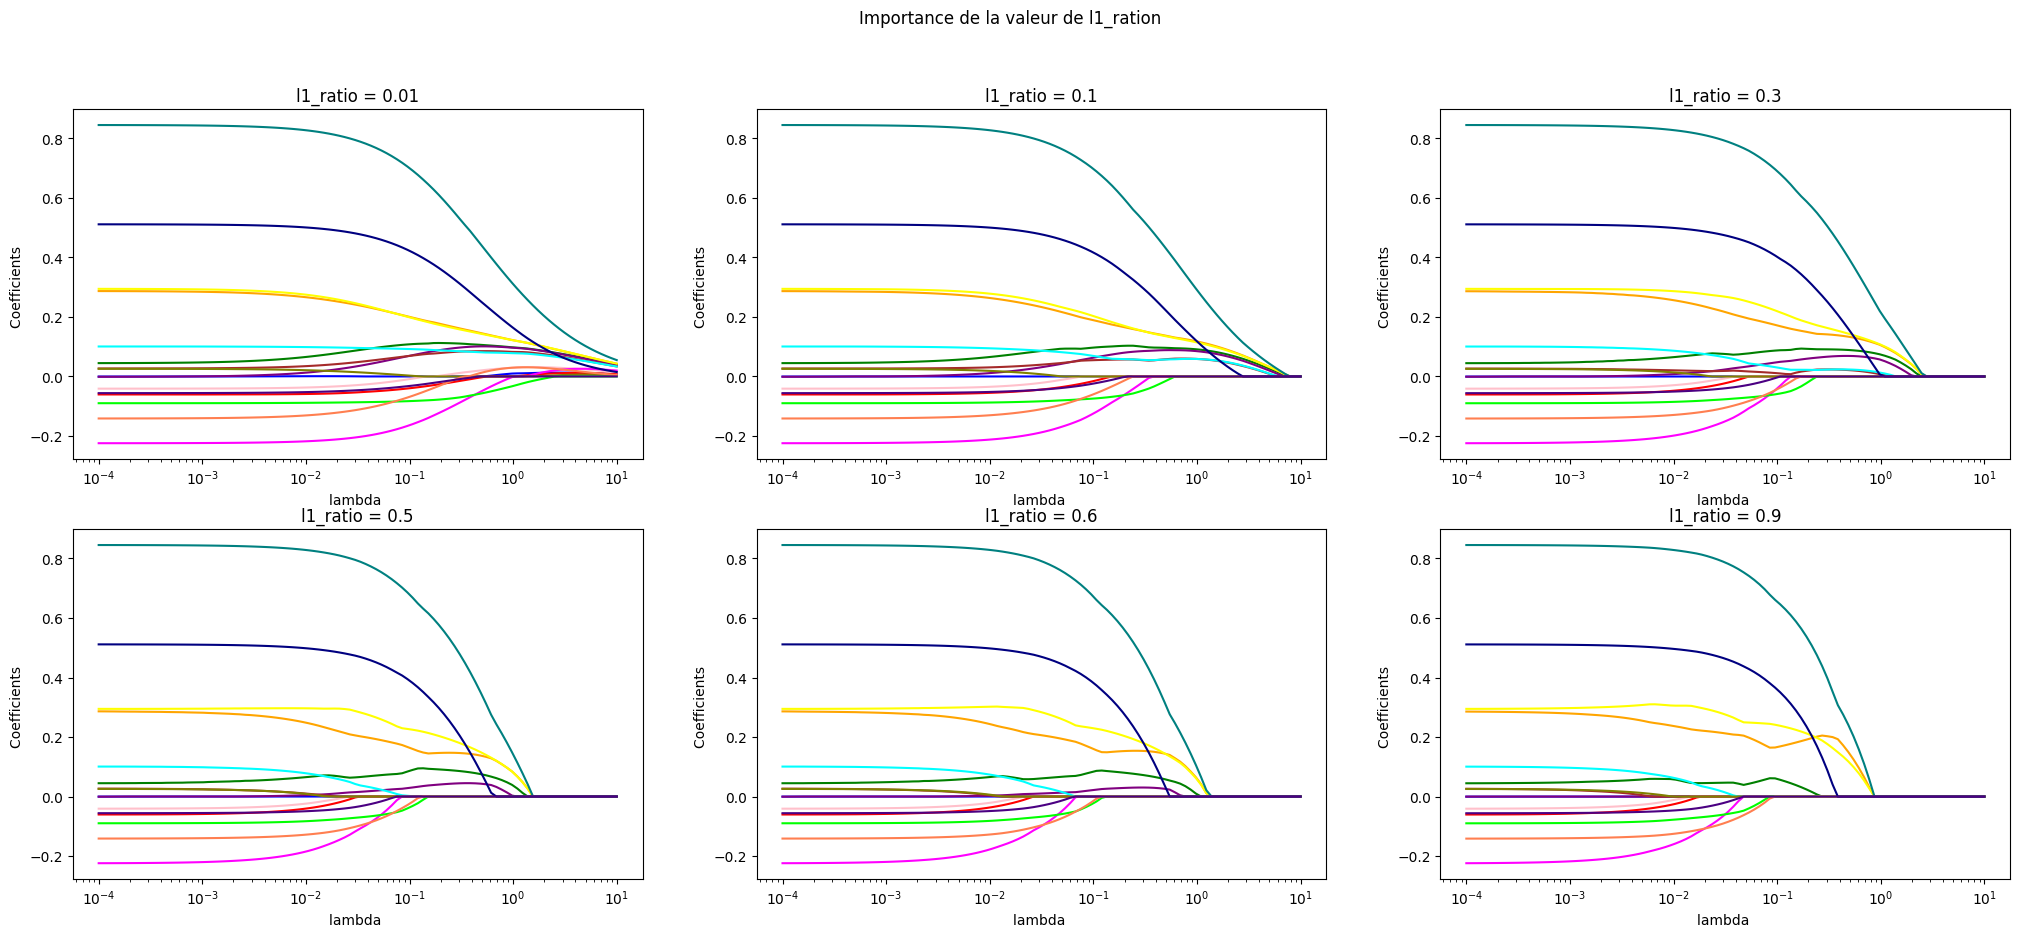

In [112]:
l1=[0.01,0.1,0.3,0.5,0.6,0.9]
plt.subplots (2,3, figsize =(25, 10))
plt.suptitle('Importance de la valeur de l1_ration')
for l in range(len(l1)):
    alphas_enet , coefs_enet , _ = enet_path(X_train_std , Y_Train ,alphas=lambdas,l1_ratio=l1[l])
    # 16 different colors , one per coefficient:
    colors = ["blue", "red", "green", "orange", "purple", "pink", "brown", "yellow",
    "cyan", "magenta", "olive", "lime", "teal", "coral", "navy", "indigo", "gold"]
    i=0
    plt.subplot(2,3,l+1)
    plt.title(f'l1_ratio = {l1[l]}')
    for coef_l , c in zip(coefs_enet , colors):
        plt. plot(alphas_enet , coef_l , color=c,label=f'coef {i+1}')
        plt.xscale('log')
        i+=1
    plt.xlabel('lambda ')
    plt.ylabel('Coefficients ')

#### On voit bien que si l1_ration est proche de 0 le resultat ressemble à celui de ridge et les coefficient s'annulent de maniére trés lente alors que si l1_ration est proche de 1 le resultat ressemble à celui de Lasso les coefficents s'annule à partir de lambda=1. La diffenrence des resultats montre l'importance du choix d'une bonne valeur der l'hyperparametre l1_ration pour assurer une meilleure performance du modele